In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import seaborn as sns

In [14]:
!pip install pandas_ta

     -------------------------------------- 115.1/115.1 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218924 sha256=092a785c1f45aa4781fe3182e81fd763ade981a8c54f580104813f8b87079246
  Stored in directory: c:\users\diya\appdata\local\pip\cache\wheels\18\cc\8f\61745c2f312ffd85e449ae8fa9e85f5442fe63196c2e89fa14
Successfully built pandas_ta


In [3]:
df_ticker = pd.read_csv("C:/Users/Diya/OneDrive/Documents/ind_nifty200list.csv")

In [4]:
df_ticker.head()

,Company Name,Industry,Symbol,Series,ISIN Code
0,ABB India Ltd.,Capital Goods,ABB,EQ,INE117A01022
1,ACC Ltd.,Construction Materials,ACC,EQ,INE012A01025
2,APL Apollo Tubes Ltd.,Capital Goods,APLAPOLLO,EQ,INE702C01027
3,AU Small Finance Bank Ltd.,Financial Services,AUBANK,EQ,INE949L01017
4,Adani Energy Solutions Ltd.,Power,ADANIENSOL,EQ,INE931S01010


In [5]:
symbol_list = df_ticker['Symbol'].unique().tolist()
type(symbol_list)

list

In [6]:
start_date = "2021-04-01"
end_date = "2024-05-01"

In [7]:
help(yf.download)

Help on function download in module yfinance.multi:

download(tickers, start=None, end=None, actions=False, threads=True, ignore_tz=None, group_by='column', auto_adjust=False, back_adjust=False, repair=False, keepna=False, progress=True, period='max', interval='1d', prepost=False, proxy=None, rounding=False, timeout=10, session=None)
    Download yahoo tickers
    :Parameters:
        tickers : str, list
            List of tickers to download
        period : str
            Valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
            Either Use period parameter or use start and end
        interval : str
            Valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
            Intraday data cannot extend last 60 days
        start: str
            Download start date string (YYYY-MM-DD) or _datetime, inclusive.
            Default is 99 years ago
            E.g. for start="2020-01-01", the first data point will be on "2020-01-01"
        end: str
            Downlo

In [26]:
tf = yf.download('WIPRO.NS',start="2021-11-11",end = "2022-11-11")

[*********************100%%**********************]  1 of 1 completed


In [30]:
tf

,Open,High,Low,Close,Adj Close,Volume,rsi
Date,,,,,,,
2021-11-11,649.750000,649.750000,636.799988,641.799988,632.556152,6033898,None
2021-11-12,648.000000,662.500000,645.799988,660.049988,650.543274,6063253,None
2021-11-15,661.549988,666.000000,657.150024,658.900024,649.409912,4717998,None
2021-11-16,658.400024,668.750000,654.650024,661.450012,651.923096,5663547,None
2021-11-17,661.450012,668.000000,658.000000,661.799988,652.268066,4427497,None
...,...,...,...,...,...,...,...
2022-11-03,389.750000,393.750000,385.549988,388.500000,386.720703,5156238,None
2022-11-04,388.500000,392.399994,385.649994,390.549988,388.761292,4511815,None
2022-11-07,393.000000,394.850006,387.600006,391.500000,389.706970,4126299,None


In [31]:
tf['rsi'] = tf['Adj Close'].transform(lambda x: pandas_ta.rsi(close=x,length=1))

In [34]:
pandas_ta.rsi(tf['Adj Close'], length = 3)

Date
2021-11-11          NaN
2021-11-12          NaN
2021-11-15          NaN
2021-11-16    93.291554
2021-11-17    93.586222
                ...    
2022-11-03    46.225167
2022-11-04    58.032981
2022-11-07    63.590541
2022-11-09    57.031898
2022-11-10    36.173144
Name: RSI_3, Length: 248, dtype: float64

In [9]:
df = yf.download(tickers= [i + ".NS" for i in symbol_list],start=start_date,end=end_date,keepna=True)

[*********************100%%**********************]  201 of 201 completed

1 Failed download:
['UNITDSPR.NS']: YFChartError("%ticker%: Data doesn't exist for startDate = 1617215400, endDate = 1714501800")


In [10]:
df.head()

Price         Adj Close                                                      \
Ticker           ABB.NS ABCAPITAL.NS    ABFRL.NS       ACC.NS ADANIENSOL.NS   
Date                                                                          
2021-04-01  1375.053467   121.550003  198.949997  1847.027222           NaN   
2021-04-05  1359.999146   120.150002  187.250000  1828.734009           NaN   
2021-04-06  1352.373535   119.349998  189.800003  1842.296997           NaN   
2021-04-07  1352.914917   127.650002  191.600006  1851.950317           NaN   
2021-04-08  1373.872803   127.800003  189.699997  1912.959839           NaN   

Price                                                              \
Ticker      ADANIENT.NS ADANIGREEN.NS ADANIPORTS.NS ADANIPOWER.NS   
Date                                                                
2021-04-01  1104.444580   1160.050049    718.167725     89.300003   
2021-04-05  1135.417480   1164.199951    724.020447     93.750000   
2021-04-06  1222.350708   1194.449951    815.028931     98.400002   
2021-04-07  1162.649658   1196.199951    794.739807     99.949997   
2021-04-08  1159.607056   1165.500000    802.787231     97.400002   

Price                    ...      Volume                              \
Ticker         ALKEM.NS  ... UNITDSPR.NS   UPL.NS   VBL.NS   VEDL.NS   
Date                     ...                                           
2021-04-01  2699.205078  ...         NaN  7348750   928476  10398919   
2021-04-05  2633.072754  ...         NaN  9077724   549697  14527112   
2021-04-06  2648.050049  ...         NaN  7227685   461200  17652029   
2021-04-07  2652.134766  ...         NaN  4948757  1342885  42365445   
2021-04-08  2632.100586  ...         NaN  3926359   520438  24821045   

Price                                                                       
Ticker     VOLTAS.NS  WIPRO.NS YESBANK.NS   ZEEL.NS ZOMATO.NS ZYDUSLIFE.NS  
Date                                                                        
2021-04-01    803202   7596943   93196660   8509692       NaN      1269615  
2021-04-05   1567700  21216395   83064018  14387268       NaN      2940040  
2021-04-06   1757333   8320520   59808985   8767242       NaN      3678053  
2021-04-07   3176468  13867650   50497122  12421910       NaN      3271918  
2021-04-08   1155524  12916614   45104506   8695941       NaN      3483861  

[5 rows x 1206 columns]

In [11]:
import os

In [12]:
def get_stock_info(stock):
    df = yf.download(f"{stock}.NS",start=start_date, end=end_date)
    path = './csv'
    try: os.mkdir(path)
    except OSError as error: pass
    df.to_csv(f'{stock}.csv')

In [13]:
for i in symbol_list:
    get_stock_info(i)   

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [20]:
df = df.stack()
df

Price                      Adj Close        Close         High          Low  \
Date       Ticker                                                             
2021-04-01 ABB.NS        1375.053467  1397.500000  1424.699951  1391.099976   
           ABCAPITAL.NS   121.550003   121.550003   123.000000   120.050003   
           ABFRL.NS       198.949997   198.949997   207.000000   197.550003   
           ACC.NS        1847.027222  1913.349976  1920.000000  1886.949951   
           ADANIENT.NS   1104.444580  1107.199951  1116.050049  1035.000000   
...                              ...          ...          ...          ...   
2024-04-30 WIPRO.NS       462.399994   462.399994   466.750000   461.500000   
           YESBANK.NS      26.150000    26.150000    27.400000    26.049999   
           ZEEL.NS        146.949997   146.949997   152.649994   146.050003   
           ZOMATO.NS      193.149994   193.149994   196.949997   192.199997   
           ZYDUSLIFE.NS   953.549988   953.549988   968.400024   948.950012   

Price                           Open       Volume  
Date       Ticker                                  
2021-04-01 ABB.NS        1413.800049      80643.0  
           ABCAPITAL.NS   120.050003    2429443.0  
           ABFRL.NS       203.600006    2452891.0  
           ACC.NS        1920.000000     765296.0  
           ADANIENT.NS   1043.400024   12713083.0  
...                              ...          ...  
2024-04-30 WIPRO.NS       463.000000    4451478.0  
           YESBANK.NS      27.250000  269821799.0  
           ZEEL.NS        150.449997   10862244.0  
           ZOMATO.NS      195.000000   39383265.0  
           ZYDUSLIFE.NS   964.900024    1728594.0  

[147863 rows x 6 columns]

In [21]:
df.head()

Price                      Adj Close        Close         High          Low  \
Date       Ticker                                                             
2021-04-01 ABB.NS        1375.053467  1397.500000  1424.699951  1391.099976   
           ABCAPITAL.NS   121.550003   121.550003   123.000000   120.050003   
           ABFRL.NS       198.949997   198.949997   207.000000   197.550003   
           ACC.NS        1847.027222  1913.349976  1920.000000  1886.949951   
           ADANIENT.NS   1104.444580  1107.199951  1116.050049  1035.000000   

Price                           Open      Volume  
Date       Ticker                                 
2021-04-01 ABB.NS        1413.800049     80643.0  
           ABCAPITAL.NS   120.050003   2429443.0  
           ABFRL.NS       203.600006   2452891.0  
           ACC.NS        1920.000000    765296.0  
           ADANIENT.NS   1043.400024  12713083.0

In [17]:
import pandas_ta

In [22]:
df['rsi'] = df.groupby(level=1)['Adj Close'].transform(lambda x: pandas_ta.rsi(close=x,length=3))

In [23]:
df['garman_klass'] = ((np.log(df['High'])-np.log(df['Low']))**2)/2-(2*np.log(2)-1)*((np.log(df['Adj Close'])-np.log(df['Open']))**2)

In [25]:
print(df)

Price                      Adj Close        Close         High          Low  \
Date       Ticker                                                             
2021-04-01 ABB.NS        1375.053467  1397.500000  1424.699951  1391.099976   
           ABCAPITAL.NS   121.550003   121.550003   123.000000   120.050003   
           ABFRL.NS       198.949997   198.949997   207.000000   197.550003   
           ACC.NS        1847.027222  1913.349976  1920.000000  1886.949951   
           ADANIENT.NS   1104.444580  1107.199951  1116.050049  1035.000000   
...                              ...          ...          ...          ...   
2024-04-30 WIPRO.NS       462.399994   462.399994   466.750000   461.500000   
           YESBANK.NS      26.150000    26.150000    27.400000    26.049999   
           ZEEL.NS        146.949997   146.949997   152.649994   146.050003   
           ZOMATO.NS      193.149994   193.149994   196.949997   192.199997   
           ZYDUSLIFE.NS   953.549988   953.549988   

In [18]:
def compute_macd(close):
    macd = pandas_ta.macd(close=close, length=20).iloc[:,0]
    return macd.sub(macd.mean()).div(macd.std())

df['macd_20'] = df.groupby(level=1, group_keys=False)['Adj Close'].apply(compute_macd)

In [29]:
def compute_atr(stock):
    atr = pandas_ta.atr(high = stock['High'],
                       low = stock['Low'],
                       close = stock['Close'],
                       length = 14)
    return atr.sub(atr.mean()).div(atr.std())

df['atr'] = df.groupby(level=1,group_keys=False).apply(compute_atr)

In [30]:
df.head(n=5000)

Price                      Adj Close        Close         High          Low  \
Date       Ticker                                                             
2021-04-01 ABB.NS        1375.053345  1397.500000  1424.699951  1391.099976   
           ABCAPITAL.NS   121.550003   121.550003   123.000000   120.050003   
           ABFRL.NS       198.949997   198.949997   207.000000   197.550003   
           ACC.NS        1847.027222  1913.349976  1920.000000  1886.949951   
           ADANIENT.NS   1104.444824  1107.199951  1116.050049  1035.000000   
...                              ...          ...          ...          ...   
2021-05-12 MAXHEALTH.NS   223.129318   223.500000   237.399994   221.250000   
           MAZDOCK.NS     197.320404   209.050003   216.550003   207.000000   
           MFSL.NS        891.049988   891.049988   919.000000   886.000000   
           MOTHERSON.NS    94.447456    96.677757    99.013756    94.259789   
           MPHASIS.NS    1700.735718  1799.349976  1858.000000  1775.050049   

Price                           Open      Volume        rsi  garman_klass  \
Date       Ticker                                                           
2021-04-01 ABB.NS        1413.800049     80643.0        NaN     -0.000013   
           ABCAPITAL.NS   120.050003   2429443.0        NaN      0.000235   
           ABFRL.NS       203.600006   2452891.0        NaN      0.000886   
           ACC.NS        1920.000000    765296.0        NaN     -0.000429   
           ADANIENT.NS   1043.400024  12713083.0        NaN      0.001593   
...                              ...         ...        ...           ...   
2021-05-12 MAXHEALTH.NS   236.000000   3811740.0  46.610846      0.001267   
           MAZDOCK.NS     214.000000    539254.0  53.910178     -0.001527   
           MFSL.NS        919.000000    342530.0  49.400639      0.000300   
           MOTHERSON.NS    95.284348  41949105.0  70.057781      0.001180   
           MPHASIS.NS    1848.300049    676426.0  55.456547     -0.001631   

Price                     macd_20           etf       atr  
Date       Ticker                                          
2021-04-01 ABB.NS             NaN  1.108884e+08       NaN  
           ABCAPITAL.NS       NaN  2.952988e+08       NaN  
           ABFRL.NS           NaN  4.880027e+08       NaN  
           ACC.NS             NaN  1.413523e+09       NaN  
           ADANIENT.NS        NaN  1.404090e+10       NaN  
...                           ...           ...       ...  
2021-05-12 MAXHEALTH.NS -0.354868  8.505109e+08 -1.155637  
           MAZDOCK.NS   -0.388674  1.064058e+08 -0.935351  
           MFSL.NS       0.756998  3.052114e+08  0.347390  
           MOTHERSON.NS  1.196690  3.961986e+09  1.099331  
           MPHASIS.NS    0.540527  1.150422e+09 -0.606069  

[5000 rows x 11 columns]

In [19]:
nifty200_ticker = '^CNX200'

In [20]:
market_data = yf.download("^CNX200", period='1d')
market_returns = market_data['Adj Close'].pct_change().dropna()

[*********************100%%**********************]  1 of 1 completed


In [21]:
def calculate_beta(stock_returns, market_returns):
    cov_matrix = np.cov(stock_returns, market_returns)
    covariance = cov_matrix[0, 1]
    market_variance = np.var(market_returns)
    beta = covariance / market_variance
    return beta

In [90]:
df['etf'] = (df['Adj Close']*df['Volume'])

In [91]:
df.head()

Price                      Adj Close        Close         High          Low  \
Date       Ticker                                                             
2021-04-01 ABB.NS        1375.053345  1397.500000  1424.699951  1391.099976   
           ABCAPITAL.NS   121.550003   121.550003   123.000000   120.050003   
           ABFRL.NS       198.949997   198.949997   207.000000   197.550003   
           ACC.NS        1847.027222  1913.349976  1920.000000  1886.949951   
           ADANIENT.NS   1104.444824  1107.199951  1116.050049  1035.000000   

Price                           Open      Volume  rsi  garman_klass  macd_20  \
Date       Ticker                                                              
2021-04-01 ABB.NS        1413.800049     80643.0  NaN     -0.000013      NaN   
           ABCAPITAL.NS   120.050003   2429443.0  NaN      0.000235      NaN   
           ABFRL.NS       203.600006   2452891.0  NaN      0.000886      NaN   
           ACC.NS        1920.000000    765296.0  NaN     -0.000429      NaN   
           ADANIENT.NS   1043.400024  12713083.0  NaN      0.001593      NaN   

Price                             etf  atr  
Date       Ticker                           
2021-04-01 ABB.NS        1.108884e+08  NaN  
           ABCAPITAL.NS  2.952988e+08  NaN  
           ABFRL.NS      4.880027e+08  NaN  
           ACC.NS        1.413523e+09  NaN  
           ADANIENT.NS   1.404090e+10  NaN

In [89]:
!pip3 install scikit-learn

     -------------------------------------- 11.0/11.0 MB 670.5 kB/s eta 0:00:00
     -------------------------------------- 301.8/301.8 kB 1.2 MB/s eta 0:00:00


In [92]:
data = df
data = data.dropna().groupby('Date', group_keys=False)

In [86]:
data.head()

Price                       Adj Close        Close         High          Low  \
Date       Ticker                                                              
2021-05-11 ABB.NS         1356.654175  1368.849976  1385.000000  1362.699951   
           ABCAPITAL.NS    119.750000   119.750000   125.349998   118.099998   
           ABFRL.NS        180.850006   180.850006   182.699997   175.300003   
           ACC.NS         1843.744995  1909.949951  1920.000000  1860.250000   
           ADANIENT.NS    1300.256348  1303.500000  1326.000000  1284.000000   
...                               ...          ...          ...          ...   
2024-04-30 ABB.NS         6517.454590  6540.750000  6642.500000  6454.000000   
           ABCAPITAL.NS    231.399994   231.399994   243.699997   230.100006   
           ABFRL.NS        263.000000   263.000000   272.500000   262.299988   
           ACC.NS         2524.595947  2531.800049  2554.699951  2525.000000   
           ADANIENSOL.NS  1065.199951  1065.199951  1087.300049  1060.349976   

Price                            Open      Volume        rsi  garman_klass  \
Date       Ticker                                                            
2021-05-11 ABB.NS         1369.000000     66321.0  46.943188      0.000100   
           ABCAPITAL.NS    121.000000   5075099.0  53.383776      0.001733   
           ABFRL.NS        175.300003   1473014.0  50.370461      0.000479   
           ACC.NS         1870.000000    692022.0  55.184947      0.000423   
           ADANIENT.NS    1292.000000   4744734.0  71.775250      0.000502   
...                               ...         ...        ...           ...   
2024-04-30 ABB.NS         6500.000000    393914.0  59.079258      0.000412   
           ABCAPITAL.NS    241.750000  15012510.0  71.678136      0.000909   
           ABFRL.NS        269.700012   5878281.0  67.616131      0.000483   
           ACC.NS         2551.000000    431087.0  52.523623      0.000027   
           ADANIENSOL.NS  1067.000000   3503339.0  52.867789      0.000314   

Price                      macd_20           etf       atr  
Date       Ticker                                           
2021-05-11 ABB.NS        -0.542335  8.997466e+07 -1.844407  
           ABCAPITAL.NS  -0.537879  6.077431e+08  0.863747  
           ABFRL.NS      -0.358816  2.663946e+08 -0.624164  
           ACC.NS        -0.066014  1.275912e+09 -0.396474  
           ADANIENT.NS    0.375667  6.169371e+09 -0.764504  
...                            ...           ...       ...  
2024-04-30 ABB.NS         1.296726  2.567317e+09  2.516437  
           ABCAPITAL.NS   3.992449  3.473895e+09  4.754166  
           ABFRL.NS       1.849599  1.545988e+09  0.962889  
           ACC.NS        -0.187817  1.088320e+09  0.638648  
           ADANIENSOL.NS -0.307269  3.731757e+09 -0.562996  

[3675 rows x 11 columns]

In [93]:
type(data)

pandas.core.groupby.generic.DataFrameGroupBy

In [209]:
lost_cols = [c for c in df.columns.unique(0) if c not in 
             ['Volume','Open','Close','High','Low']]
data = (pd.concat([df.unstack('Ticker')['etf'].stack('Ticker').to_frame('etf'),
                df.unstack()[lost_cols].stack('Ticker')],
                axis=1)).dropna()
data

etf    Adj Close       atr           etf  \
Date       Ticker                                                             
2021-05-11 ABB.NS         8.997466e+07  1356.654175 -1.844407  8.997466e+07   
           ABCAPITAL.NS   6.077431e+08   119.750000  0.863747  6.077431e+08   
           ABFRL.NS       2.663946e+08   180.850006 -0.624164  2.663946e+08   
           ACC.NS         1.275912e+09  1843.744995 -0.396474  1.275912e+09   
           ADANIENT.NS    6.169371e+09  1300.256348 -0.764504  6.169371e+09   
...                                ...          ...       ...           ...   
2024-04-30 MANKIND.NS     5.478102e+08  2364.399902  1.299827  5.478102e+08   
           ADANIENSOL.NS  3.731757e+09  1065.199951 -0.562996  3.731757e+09   
           JIOFIN.NS      6.350539e+09   377.000000  0.667084  6.350539e+09   
           JSWINFRA.NS    6.097310e+08   250.000000 -0.558964  6.097310e+08   
           TATATECH.NS    5.986704e+08  1057.021240 -0.721510  5.986704e+08   

                          garman_klass   macd_20  return_14m  return_1m  \
Date       Ticker                                                         
2021-05-11 ABB.NS             0.000100 -0.542335   -0.001371  -0.004726   
           ABCAPITAL.NS       0.001733 -0.537879    0.001478  -0.018443   
           ABFRL.NS           0.000479 -0.358816    0.002824   0.026973   
           ACC.NS             0.000423 -0.066014    0.003224   0.012860   
           ADANIENT.NS        0.000502  0.375667    0.009445  -0.000460   
...                                ...       ...         ...        ...   
2024-04-30 MANKIND.NS         0.000253  0.323041    0.000178  -0.005301   
           ADANIENSOL.NS      0.000314 -0.307269   -0.000710   0.003958   
           JIOFIN.NS          0.000206  0.753225    0.001485  -0.009198   
           JSWINFRA.NS        0.000136 -0.538866    0.000906   0.011941   
           TATATECH.NS        0.000029  1.248098   -0.002286   0.000234   

                          return_21m  return_2m  return_7m        rsi  
Date       Ticker                                                      
2021-05-11 ABB.NS          -0.000600  -0.001130  -0.001287  46.943188  
           ABCAPITAL.NS    -0.003093   0.016473   0.006362  53.383776  
           ABFRL.NS        -0.002272   0.013541   0.004708  50.370461  
           ACC.NS          -0.001753   0.001364   0.002051  55.184947  
           ADANIENT.NS      0.005466   0.001769   0.016964  71.775250  
...                              ...        ...        ...        ...  
2024-04-30 MANKIND.NS       0.000568  -0.000971   0.001639  56.190453  
           ADANIENSOL.NS    0.002308   0.001105   0.003343  52.867789  
           JIOFIN.NS        0.003449  -0.006241   0.002642  58.793376  
           JSWINFRA.NS      0.000469  -0.004963   0.006329  55.915408  
           TATATECH.NS      0.001726  -0.002521   0.003599  47.855723  

[142847 rows x 12 columns]

In [210]:
data = data.loc[:, ~data.columns.duplicated()]

In [211]:
data.head()

etf    Adj Close       atr  garman_klass  \
Date       Ticker                                                            
2021-05-11 ABB.NS        8.997466e+07  1356.654175 -1.844407      0.000100   
           ABCAPITAL.NS  6.077431e+08   119.750000  0.863747      0.001733   
           ABFRL.NS      2.663946e+08   180.850006 -0.624164      0.000479   
           ACC.NS        1.275912e+09  1843.744995 -0.396474      0.000423   
           ADANIENT.NS   6.169371e+09  1300.256348 -0.764504      0.000502   

                          macd_20  return_14m  return_1m  return_21m  \
Date       Ticker                                                      
2021-05-11 ABB.NS       -0.542335   -0.001371  -0.004726   -0.000600   
           ABCAPITAL.NS -0.537879    0.001478  -0.018443   -0.003093   
           ABFRL.NS     -0.358816    0.002824   0.026973   -0.002272   
           ACC.NS       -0.066014    0.003224   0.012860   -0.001753   
           ADANIENT.NS   0.375667    0.009445  -0.000460    0.005466   

                         return_2m  return_7m        rsi  
Date       Ticker                                         
2021-05-11 ABB.NS        -0.001130  -0.001287  46.943188  
           ABCAPITAL.NS   0.016473   0.006362  53.383776  
           ABFRL.NS       0.013541   0.004708  50.370461  
           ACC.NS         0.001364   0.002051  55.184947  
           ADANIENT.NS    0.001769   0.016964  71.775250

In [266]:
def timeseries(df):
    outlier = 0.001;
    lags = [1,2,5,10]
    for lag in lags:
        df[f'return_{lag}'] = (df['Adj Close']
                               .pct_change(lag)
                               .pipe(lambda x: x.clip(lower=x.quantile(outlier),
                                                      upper = x.quantile(1-outlier)))
                               .add(1)
                               .pow(1/lag)
                               .sub(1))
    return df

In [275]:
data=data.drop('cluster4',axis=1)
data

etf    Adj Close       atr  garman_klass  \
Date       Ticker                                                             
2021-05-11 ABB.NS         8.997466e+07  1356.654175 -1.844407      0.000100   
           ABCAPITAL.NS   6.077431e+08   119.750000  0.863747      0.001733   
           ABFRL.NS       2.663946e+08   180.850006 -0.624164      0.000479   
           ACC.NS         1.275912e+09  1843.744995 -0.396474      0.000423   
           ADANIENT.NS    6.169371e+09  1300.256348 -0.764504      0.000502   
...                                ...          ...       ...           ...   
2024-04-30 MANKIND.NS     5.478102e+08  2364.399902  1.299827      0.000253   
           ADANIENSOL.NS  3.731757e+09  1065.199951 -0.562996      0.000314   
           JIOFIN.NS      6.350539e+09   377.000000  0.667084      0.000206   
           JSWINFRA.NS    6.097310e+08   250.000000 -0.558964      0.000136   
           TATATECH.NS    5.986704e+08  1057.021240 -0.721510      0.000029   

                           macd_20  return_14m  return_1m  return_21m  \
Date       Ticker                                                       
2021-05-11 ABB.NS        -0.542335   -0.001371  -0.004726   -0.000600   
           ABCAPITAL.NS  -0.537879    0.001478  -0.018443   -0.003093   
           ABFRL.NS      -0.358816    0.002824   0.026973   -0.002272   
           ACC.NS        -0.066014    0.003224   0.012860   -0.001753   
           ADANIENT.NS    0.375667    0.009445  -0.000460    0.005466   
...                            ...         ...        ...         ...   
2024-04-30 MANKIND.NS     0.323041    0.000178  -0.005301    0.000568   
           ADANIENSOL.NS -0.307269   -0.000710   0.003958    0.002308   
           JIOFIN.NS      0.753225    0.001485  -0.009198    0.003449   
           JSWINFRA.NS   -0.538866    0.000906   0.011941    0.000469   
           TATATECH.NS    1.248098   -0.002286   0.000234    0.001726   

                          return_2m  return_7m        rsi  
Date       Ticker                                          
2021-05-11 ABB.NS         -0.001130  -0.001287  46.943188  
           ABCAPITAL.NS    0.016473   0.006362  53.383776  
           ABFRL.NS        0.013541   0.004708  50.370461  
           ACC.NS          0.001364   0.002051  55.184947  
           ADANIENT.NS     0.001769   0.016964  71.775250  
...                             ...        ...        ...  
2024-04-30 MANKIND.NS     -0.000971   0.001639  56.190453  
           ADANIENSOL.NS   0.001105   0.003343  52.867789  
           JIOFIN.NS      -0.006241   0.002642  58.793376  
           JSWINFRA.NS    -0.004963   0.006329  55.915408  
           TATATECH.NS    -0.002521   0.003599  47.855723  

[142847 rows x 11 columns]

In [270]:
df = df.groupby(level=1, group_keys=False).apply(timeseries).dropna()

In [271]:
data.head(1000)

etf    Adj Close       atr  garman_klass  \
Date       Ticker                                                            
2021-05-11 ABB.NS        8.997466e+07  1356.654175 -1.844407      0.000100   
           ABCAPITAL.NS  6.077431e+08   119.750000  0.863747      0.001733   
           ABFRL.NS      2.663946e+08   180.850006 -0.624164      0.000479   
           ACC.NS        1.275912e+09  1843.744995 -0.396474      0.000423   
           ADANIENT.NS   6.169371e+09  1300.256348 -0.764504      0.000502   
...                               ...          ...       ...           ...   
2021-05-19 FORTIS.NS     5.002016e+08   220.926544 -0.044944      0.000085   
           GAIL.NS       1.195825e+09    88.644836  0.513545     -0.007241   
           GLAND.NS      5.246558e+09  3341.449951  2.521570      0.008645   
           GMRINFRA.NS   5.032016e+08    24.144882 -0.962750      0.000583   
           GODREJCP.NS   1.816975e+09   811.495178  1.216554      0.000253   

                          macd_20  return_14m  return_1m  return_21m  \
Date       Ticker                                                      
2021-05-11 ABB.NS       -0.542335   -0.001371  -0.004726   -0.000600   
           ABCAPITAL.NS -0.537879    0.001478  -0.018443   -0.003093   
           ABFRL.NS     -0.358816    0.002824   0.026973   -0.002272   
           ACC.NS       -0.066014    0.003224   0.012860   -0.001753   
           ADANIENT.NS   0.375667    0.009445  -0.000460    0.005466   
...                           ...         ...        ...         ...   
2021-05-19 FORTIS.NS     0.832801    0.003270  -0.005832    0.004031   
           GAIL.NS       1.205222    0.009773   0.000000    0.004312   
           GLAND.NS      2.084196    0.016163   0.091068    0.011518   
           GMRINFRA.NS   0.029023    0.010513   0.020952    0.005368   
           GODREJCP.NS   1.276406    0.010304   0.006616    0.005523   

                         return_2m  return_7m        rsi  cluster4  
Date       Ticker                                                   
2021-05-11 ABB.NS        -0.001130  -0.001287  46.943188         0  
           ABCAPITAL.NS   0.016473   0.006362  53.383776         0  
           ABFRL.NS       0.013541   0.004708  50.370461         0  
           ACC.NS         0.001364   0.002051  55.184947         0  
           ADANIENT.NS    0.001769   0.016964  71.775250         1  
...                            ...        ...        ...       ...  
2021-05-19 FORTIS.NS     -0.005483  -0.007080  53.776584         0  
           GAIL.NS       -0.001143   0.002407  61.519773         0  
           GLAND.NS       0.093746   0.033840  80.075834         2  
           GMRINFRA.NS    0.011386   0.015587  70.991166         0  
           GODREJCP.NS   -0.011835   0.022717  65.581541         0  

[1000 rows x 12 columns]

In [105]:
from sklearn.cluster import KMeans

In [276]:
inertias = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)
inertias

[2.200926473935505e+24,
 1.0244493272938947e+24,
 5.649363276350886e+23,
 3.678832822382599e+23,
 2.5132486593338222e+23,
 1.8289816182654714e+23,
 1.3939042274182758e+23,
 1.104493925981131e+23,
 8.92284226042922e+22,
 7.190032242466641e+22]

In [107]:
from matplotlib import pyplot as plt

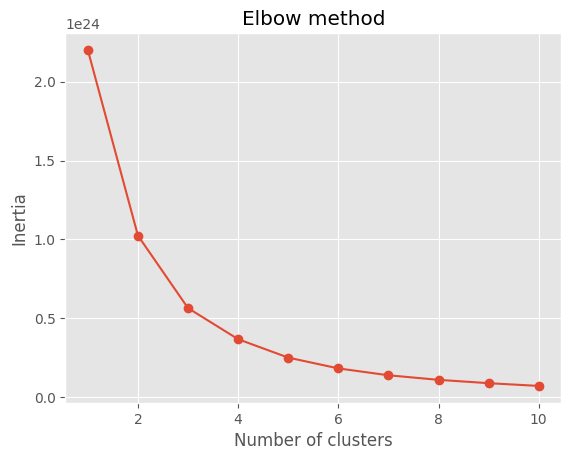

In [277]:
plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [278]:
def get_clusters(df):
    df['cluster4'] = KMeans(n_clusters=4).fit(df).labels_
    return df

data = data.dropna().groupby('Date', group_keys=False).apply(get_clusters)

data

etf    Adj Close       atr  garman_klass  \
Date       Ticker                                                             
2021-05-11 ABB.NS         8.997466e+07  1356.654175 -1.844407      0.000100   
           ABCAPITAL.NS   6.077431e+08   119.750000  0.863747      0.001733   
           ABFRL.NS       2.663946e+08   180.850006 -0.624164      0.000479   
           ACC.NS         1.275912e+09  1843.744995 -0.396474      0.000423   
           ADANIENT.NS    6.169371e+09  1300.256348 -0.764504      0.000502   
...                                ...          ...       ...           ...   
2024-04-30 MANKIND.NS     5.478102e+08  2364.399902  1.299827      0.000253   
           ADANIENSOL.NS  3.731757e+09  1065.199951 -0.562996      0.000314   
           JIOFIN.NS      6.350539e+09   377.000000  0.667084      0.000206   
           JSWINFRA.NS    6.097310e+08   250.000000 -0.558964      0.000136   
           TATATECH.NS    5.986704e+08  1057.021240 -0.721510      0.000029   

                           macd_20  return_14m  return_1m  return_21m  \
Date       Ticker                                                       
2021-05-11 ABB.NS        -0.542335   -0.001371  -0.004726   -0.000600   
           ABCAPITAL.NS  -0.537879    0.001478  -0.018443   -0.003093   
           ABFRL.NS      -0.358816    0.002824   0.026973   -0.002272   
           ACC.NS        -0.066014    0.003224   0.012860   -0.001753   
           ADANIENT.NS    0.375667    0.009445  -0.000460    0.005466   
...                            ...         ...        ...         ...   
2024-04-30 MANKIND.NS     0.323041    0.000178  -0.005301    0.000568   
           ADANIENSOL.NS -0.307269   -0.000710   0.003958    0.002308   
           JIOFIN.NS      0.753225    0.001485  -0.009198    0.003449   
           JSWINFRA.NS   -0.538866    0.000906   0.011941    0.000469   
           TATATECH.NS    1.248098   -0.002286   0.000234    0.001726   

                          return_2m  return_7m        rsi  cluster4  
Date       Ticker                                                    
2021-05-11 ABB.NS         -0.001130  -0.001287  46.943188         3  
           ABCAPITAL.NS    0.016473   0.006362  53.383776         3  
           ABFRL.NS        0.013541   0.004708  50.370461         3  
           ACC.NS          0.001364   0.002051  55.184947         3  
           ADANIENT.NS     0.001769   0.016964  71.775250         0  
...                             ...        ...        ...       ...  
2024-04-30 MANKIND.NS     -0.000971   0.001639  56.190453         0  
           ADANIENSOL.NS   0.001105   0.003343  52.867789         0  
           JIOFIN.NS      -0.006241   0.002642  58.793376         3  
           JSWINFRA.NS    -0.004963   0.006329  55.915408         0  
           TATATECH.NS    -0.002521   0.003599  47.855723         0  

[142847 rows x 12 columns]

In [234]:
data = data.drop('cluster3',axis=1)
#data
#get_clusters(data)

In [116]:
from sklearn.metrics import silhouette_score

In [35]:

def sil(df):
    k=range(2,10)
    fits=[]
    score=[]
    dist = []
    for i in k:
        kmeans=KMeans(n_clusters=i,n_init='auto').fit(df)
        fits.append(kmeans)
        score.append(silhouette_score(df,kmeans.labels_,metric='euclidean'))
        dist.append(kmeans.inertia_) 

In [124]:
'''new_data = df.dropna()
new_data = new_data[['rsi','macd_20','etf','garman_klass']]
new_data = new_data.groupby('Date', group_keys=False).apply(get_clusters)'''

"new_data = df.dropna()\nnew_data = new_data[['rsi','macd_20','etf','garman_klass']]\nnew_data = new_data.groupby('Date', group_keys=False).apply(get_clusters)"

In [231]:
data.head()
#data.tail()

etf    Adj Close       atr  garman_klass  \
Date       Ticker                                                            
2021-05-11 ABB.NS        8.997466e+07  1356.654175 -1.844407      0.000100   
           ABCAPITAL.NS  6.077431e+08   119.750000  0.863747      0.001733   
           ABFRL.NS      2.663946e+08   180.850006 -0.624164      0.000479   
           ACC.NS        1.275912e+09  1843.744995 -0.396474      0.000423   
           ADANIENT.NS   6.169371e+09  1300.256348 -0.764504      0.000502   

                          macd_20  return_14m  return_1m  return_21m  \
Date       Ticker                                                      
2021-05-11 ABB.NS       -0.542335   -0.001371  -0.004726   -0.000600   
           ABCAPITAL.NS -0.537879    0.001478  -0.018443   -0.003093   
           ABFRL.NS     -0.358816    0.002824   0.026973   -0.002272   
           ACC.NS       -0.066014    0.003224   0.012860   -0.001753   
           ADANIENT.NS   0.375667    0.009445  -0.000460    0.005466   

                         return_2m  return_7m        rsi  cluster3  
Date       Ticker                                                   
2021-05-11 ABB.NS        -0.001130  -0.001287  46.943188         0  
           ABCAPITAL.NS   0.016473   0.006362  53.383776         0  
           ABFRL.NS       0.013541   0.004708  50.370461         0  
           ACC.NS         0.001364   0.002051  55.184947         0  
           ADANIENT.NS    0.001769   0.016964  71.775250         2

In [117]:
plt.style.use('ggplot')

In [286]:
def plot_clusters(data):

    cluster_0 = data[data['cluster4']==0]
    cluster_1 = data[data['cluster4']==1]
    cluster_2 = data[data['cluster4']==2]
    cluster_3 = data[data['cluster4']==3]

    plt.scatter(cluster_0.iloc[:,2] , cluster_0.iloc[:,10] , color = 'red', label='cluster 0')
    plt.scatter(cluster_1.iloc[:,2] , cluster_1.iloc[:,10] , color = 'green', label='cluster 1')
    plt.scatter(cluster_2.iloc[:,2] , cluster_2.iloc[:,10] , color = 'blue', label='cluster 2')
    plt.scatter(cluster_3.iloc[:,2] , cluster_3.iloc[:,10] , color = 'black', label='cluster 3')
    
    plt.legend()
    plt.axis()
    plt.show()
    return

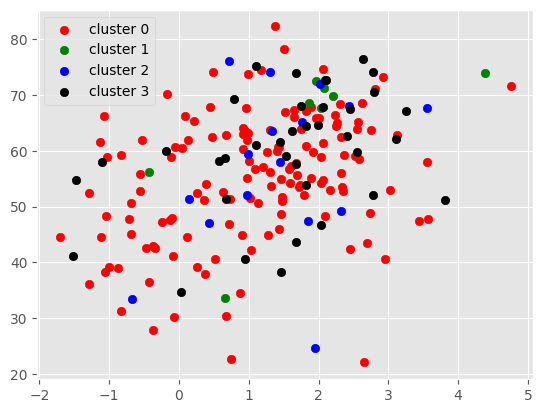

In [289]:
g = data.xs("2024-04-30")
plot_clusters(g)   #last day

In [281]:
list_rsi70 = g[g['rsi']>70]
list_rsi70  # sell these

,etf,Adj Close,atr,garman_klass,macd_20,return_14m,return_1m,return_21m,return_2m,return_7m,rsi,cluster4
Ticker,,,,,,,,,,,,
ABCAPITAL.NS,3.473895e+09,231.399994,4.754166,0.000909,3.992449,0.009344,-0.038438,0.013240,0.000216,0.020397,71.678136,0
ASHOKLEY.NS,1.060253e+10,192.649994,0.719625,0.000652,1.673746,0.005989,0.039385,0.007620,0.020466,0.018586,76.023716,2
AXISBANK.NS,2.211149e+10,1165.900024,1.963607,0.000272,1.093343,0.005745,0.005736,0.004869,0.015626,0.017990,72.507125,1
BHEL.NS,7.054984e+09,281.700012,2.098631,0.000302,2.057234,0.006730,0.017335,0.007042,0.005097,0.014583,72.725663,3
CUMMINSIND.NS,1.723028e+09,3275.449951,2.814923,0.000107,2.645780,0.006578,-0.009166,0.004699,0.005324,0.010797,71.103580,0
DIVISLAB.NS,1.442741e+09,4002.399902,-0.174195,0.000262,1.329896,0.003789,0.003296,0.008254,-0.001738,0.012396,70.199101,0
EICHERMOT.NS,3.051533e+09,4597.399902,2.064559,0.000285,2.897190,0.006380,0.005589,0.007695,-0.000391,0.008127,74.593019,0
ESCORTS.NS,1.977178e+09,3358.550049,1.506976,0.000486,2.135555,0.006385,0.021659,0.008721,0.010103,0.011198,78.209787,0
HAL.NS,8.092441e+09,3939.350098,2.790960,0.000129,3.767935,0.007114,-0.019501,0.008745,-0.005669,0.007012,70.505201,3


In [283]:
list_rsi30 = g[g['rsi']<35]
list_rsi30  # buy these

,etf,Adj Close,atr,garman_klass,macd_20,return_14m,return_1m,return_21m,return_2m,return_7m,rsi,cluster4
Ticker,,,,,,,,,,,,
BERGEPAINT.NS,8.869330e+08,508.549988,-0.830415,0.000382,-1.847975,-0.006860,0.008328,-0.005184,0.005402,0.001129,31.224562,0
COFORGE.NS,1.171179e+09,5081.983398,-0.070421,0.000180,-2.086016,-0.007646,-0.015615,-0.003982,-0.014169,-0.000416,30.252017,0
HCLTECH.NS,1.025764e+10,1348.496704,1.949788,0.000168,-2.510806,-0.008499,-0.014992,-0.005862,-0.037071,-0.008182,24.691992,2
HDFCLIFE.NS,5.773957e+09,581.671875,0.027101,0.000198,-0.788047,-0.005960,0.014867,-0.003357,-0.003579,-0.004306,34.757124,3
INFY.NS,9.798546e+09,1412.588745,-0.667757,-0.000005,-1.412176,-0.002765,-0.009897,-0.002074,-0.003397,0.000939,33.475795,2
KOTAKBANK.NS,2.956636e+10,1623.949951,0.661739,0.000097,-1.108856,-0.006866,-0.010028,-0.004242,0.004791,-0.014020,33.607323,1
LTTS.NS,1.267710e+09,4608.932617,0.752097,0.000081,-1.779137,-0.014605,-0.015760,-0.007599,-0.014541,-0.017006,22.582289,0
M&MFIN.NS,1.060134e+09,261.149994,0.874978,0.000213,-1.596069,-0.009598,-0.001338,-0.002363,0.004821,-0.011488,34.509259,0
PERSISTENT.NS,2.005378e+09,3368.600098,2.651824,0.000195,-3.626419,-0.010477,-0.001541,-0.008732,-0.004255,-0.020158,22.038727,0


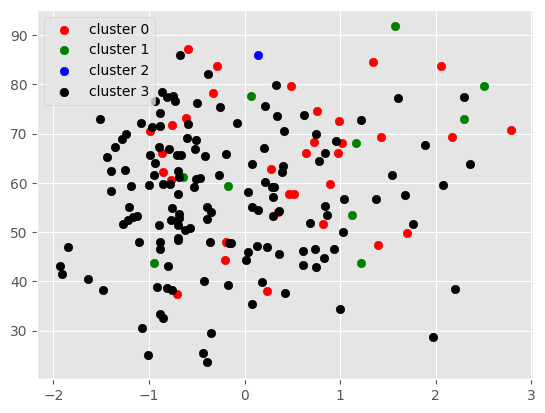

,etf,Adj Close,atr,garman_klass,macd_20,return_14m,return_1m,return_21m,return_2m,return_7m,rsi,cluster4
Ticker,,,,,,,,,,,,
ABB.NS,8.997466e+07,1356.654175,-1.844407,0.000100,-0.542335,-0.001371,-0.004726,-0.000600,-0.001130,-0.001287,46.943188,3
ABCAPITAL.NS,6.077431e+08,119.750000,0.863747,0.001733,-0.537879,0.001478,-0.018443,-0.003093,0.016473,0.006362,53.383776,3
ABFRL.NS,2.663946e+08,180.850006,-0.624164,0.000479,-0.358816,0.002824,0.026973,-0.002272,0.013541,0.004708,50.370461,3
ACC.NS,1.275912e+09,1843.744995,-0.396474,0.000423,-0.066014,0.003224,0.012860,-0.001753,0.001364,0.002051,55.184947,3
ADANIGREEN.NS,3.708234e+08,1077.949951,-0.883130,0.000140,-0.253996,0.002292,-0.022578,-0.003712,-0.011376,0.008074,46.506042,3
...,...,...,...,...,...,...,...,...,...,...,...,...
UNIONBANK.NS,2.917003e+08,32.352787,-0.682213,-0.000134,-0.444639,0.005370,0.023188,-0.001721,0.010796,0.004533,53.634583,3
VBL.NS,1.291129e+08,218.349487,-1.204839,0.000177,-0.693764,0.004964,0.007714,-0.000399,-0.002983,0.006232,55.099172,3
VEDL.NS,2.765229e+09,153.065964,0.331243,-0.153579,1.517829,0.017586,-0.017866,0.009272,0.009756,0.016563,79.827702,3


In [290]:
h = data.xs("2021-05-11")
plot_clusters(h)   #first day
h[h['cluster4']==3]

In [246]:
g[(g['cluster4']==3)].copy()  

,etf,Adj Close,atr,garman_klass,macd_20,return_14m,return_1m,return_21m,return_2m,return_7m,rsi,cluster4
Ticker,,,,,,,,,,,,
ADANIPOWER.NS,3.591363e+09,612.450012,1.415424,0.000938,0.410496,0.000163,0.027428,0.008142,0.017469,0.004246,60.708025,3
APOLLOHOSP.NS,6.189968e+09,5947.100098,1.457647,0.000179,-0.846463,-0.004197,-0.003560,-0.002222,-0.025203,-0.005232,38.334851,3
ASIANPAINT.NS,3.676208e+09,2848.340576,-1.292552,0.000193,-0.153199,-0.000399,0.002685,0.000758,0.005566,0.003391,52.385927,3
AUBANK.NS,4.809567e+09,633.599976,-0.182441,0.000483,0.444784,-0.000034,-0.006819,0.005769,0.027790,0.004336,59.926814,3
BANDHANBNK.NS,4.393759e+09,188.300003,-1.473491,0.000380,-0.026164,0.001283,0.023926,0.001924,0.011068,0.011721,54.727892,3
BHARTIARTL.NS,6.971913e+09,1322.300049,2.457523,0.000062,2.789899,0.006675,-0.007617,0.003654,-0.001396,0.003650,67.554984,3
BHEL.NS,7.054984e+09,281.700012,2.098631,0.000302,2.057234,0.006730,0.017335,0.007042,0.005097,0.014583,72.725663,3
BPCL.NS,3.802222e+09,303.674988,2.331821,0.000311,0.028301,0.001836,-0.018504,0.000963,-0.001724,0.005174,53.507364,3
BSE.NS,6.716529e+09,2774.854004,3.807590,0.000591,2.350324,-0.000295,0.006820,0.005945,-0.067739,0.001111,51.218210,3


In [167]:
filtered_df = g[(g['cluster4']==2) | (g['cluster4']==1)].copy()

In [168]:
filtered_df

Price,rsi,macd_20,etf,garman_klass,cluster4
Ticker,,,,,
AXISBANK.NS,43.315251,-1.179765,1.071842e+10,0.000081,1
BAJFINANCE.NS,74.933456,0.376563,2.576891e+10,0.000735,2
BHARTIARTL.NS,63.186635,1.775596,1.292288e+10,0.000109,1
HDFCBANK.NS,51.139352,-0.156068,3.970376e+10,0.000065,2
ICICIBANK.NS,63.190446,0.636812,2.412975e+10,0.000145,2
IDFCFIRSTB.NS,33.004944,-1.177919,1.438873e+10,0.000082,1
INFY.NS,30.025188,-1.650654,1.861998e+10,0.000134,1
ITC.NS,58.799703,-0.025748,1.175667e+10,-0.000003,1
KOTAKBANK.NS,59.217326,0.275429,1.183799e+10,0.000131,1


In [169]:
ticker_names5 = filtered_df.index.get_level_values('Ticker')
ticker_names5 = ticker_names5.tolist()

In [158]:
ticker_names1 = filtered_df.index.get_level_values('Ticker')
ticker_names1 = ticker_names1.unique().tolist()

In [132]:
len(ticker_names1)

5

In [124]:
ticker_names  #last day w 3 clusters

['BAJFINANCE.NS',
 'HDFCBANK.NS',
 'ICICIBANK.NS',
 'INFY.NS',
 'LT.NS',
 'RELIANCE.NS',
 'SBIN.NS',
 'TCS.NS']

In [161]:
ticker_names1    #1st day with 3 clusters

['BAJFINANCE.NS', 'HDFCBANK.NS', 'ICICIBANK.NS', 'RELIANCE.NS']

In [162]:
ticker_names4    #last day with 4 clusters

['BAJFINANCE.NS', 'HDFCBANK.NS', 'ICICIBANK.NS', 'RELIANCE.NS']

In [170]:
ticker_names5    #first day with 4 clusters

['AXISBANK.NS',
 'BAJFINANCE.NS',
 'BHARTIARTL.NS',
 'HDFCBANK.NS',
 'ICICIBANK.NS',
 'IDFCFIRSTB.NS',
 'INFY.NS',
 'ITC.NS',
 'KOTAKBANK.NS',
 'LT.NS',
 'MARUTI.NS',
 'RELIANCE.NS',
 'SBIN.NS',
 'TATAMOTORS.NS',
 'TATASTEEL.NS',
 'TCS.NS']

In [177]:
final_ticker = (ticker_names + ticker_names1 + ticker_names4 + ticker_names5)

In [179]:
type(final_ticker)

list

In [181]:
final_ticke = list(set(final_ticker))

In [182]:
final_ticke

['RELIANCE.NS',
 'TCS.NS',
 'ITC.NS',
 'KOTAKBANK.NS',
 'LT.NS',
 'ICICIBANK.NS',
 'HDFCBANK.NS',
 'BAJFINANCE.NS',
 'INFY.NS',
 'SBIN.NS',
 'IDFCFIRSTB.NS',
 'TATAMOTORS.NS',
 'TATASTEEL.NS',
 'MARUTI.NS',
 'AXISBANK.NS',
 'BHARTIARTL.NS']

In [198]:
sector_names = df_ticker['Industry'].unique().tolist()

In [199]:
sector_names

['Capital Goods',
 'Construction Materials',
 'Financial Services',
 'Power',
 'Metals & Mining',
 'Services',
 'Oil Gas & Consumable Fuels',
 'Consumer Services',
 'Healthcare',
 'Automobile and Auto Components',
 'Consumer Durables',
 'Telecommunication',
 'Fast Moving Consumer Goods',
 'Information Technology',
 'Realty',
 'Chemicals',
 'Construction',
 'Textiles',
 'Media Entertainment & Publication']

In [202]:
final_ticker_split = [ticker.split('.')[0] for ticker in final_ticke]

In [203]:
final_ticker_df = pd.DataFrame(final_ticker_split, columns=['Symbol'])

In [205]:
merged_df = pd.merge(final_ticker_df, df_ticker, on='Symbol', how='left')

In [206]:
merged_df

,Symbol,Company Name,Industry,Series,ISIN Code
0,RELIANCE,Reliance Industries Ltd.,Oil Gas & Consumable Fuels,EQ,INE002A01018
1,TCS,Tata Consultancy Services Ltd.,Information Technology,EQ,INE467B01029
2,ITC,ITC Ltd.,Fast Moving Consumer Goods,EQ,INE154A01025
3,KOTAKBANK,Kotak Mahindra Bank Ltd.,Financial Services,EQ,INE237A01028
4,LT,Larsen & Toubro Ltd.,Construction,EQ,INE018A01030
5,ICICIBANK,ICICI Bank Ltd.,Financial Services,EQ,INE090A01021
6,HDFCBANK,HDFC Bank Ltd.,Financial Services,EQ,INE040A01034
7,BAJFINANCE,Bajaj Finance Ltd.,Financial Services,EQ,INE296A01024
8,INFY,Infosys Ltd.,Information Technology,EQ,INE009A01021
9,SBIN,State Bank of India,Financial Services,EQ,INE062A01020


In [208]:
industry_counts = df_ticker['Industry'].value_counts()
print(industry_counts)

Industry
Financial Services                   45
Healthcare                           19
Capital Goods                        16
Automobile and Auto Components       16
Information Technology               14
Oil Gas & Consumable Fuels           12
Fast Moving Consumer Goods           12
Power                                10
Consumer Services                     9
Metals & Mining                       8
Consumer Durables                     7
Chemicals                             7
Services                              6
Construction Materials                6
Realty                                5
Telecommunication                     4
Construction                          2
Media Entertainment & Publication     2
Textiles                              1
Name: count, dtype: int64


In [209]:
industry_counts = merged_df['Industry'].value_counts()
print(industry_counts)

Industry
Financial Services                7
Information Technology            2
Automobile and Auto Components    2
Oil Gas & Consumable Fuels        1
Fast Moving Consumer Goods        1
Construction                      1
Metals & Mining                   1
Telecommunication                 1
Name: count, dtype: int64


In [210]:
from sklearn import preprocessing

In [211]:
X_norm = preprocessing.normalize(data)

In [212]:
kmeans=KMeans(n_clusters=3, n_init='auto')
kmeans.fit(X_norm)

KMeans(n_clusters=3)

In [215]:
train_clusters = kmeans.predict(X_norm)

In [216]:
train_clusters

array([0, 0, 0, ..., 0, 0, 0])

<Axes: >

C:\Users\Diya\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\Diya\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


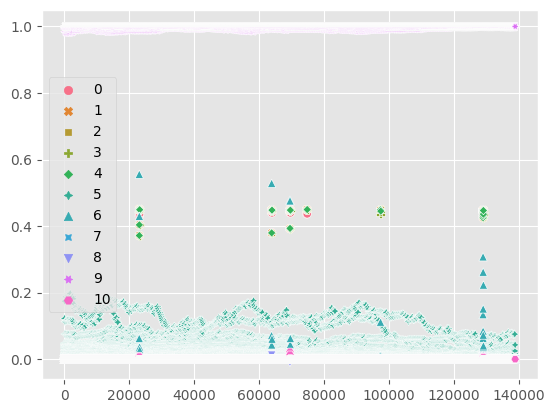

In [214]:
sns.scatterplot(data = X_norm)

In [248]:
data1 = data
data1['yesno'] = data['rsi']<30
data1 = data[data1['yesno']]
data1.tail()

Price                       Adj Close        Close         High          Low  \
Date       Ticker                                                              
2024-03-27 COFORGE.NS     5526.125000  5549.250000  5631.600098  5530.850098   
           HINDUNILVR.NS  2218.089844  2239.699951  2263.000000  2236.000000   
           INFY.NS        1475.533936  1483.849976  1499.000000  1481.550049   
           LTIM.NS        4883.933105  4927.500000  5002.899902  4915.000000   
2024-03-28 COFORGE.NS     5479.520020  5502.450195  5594.000000  5485.000000   

Price                            Open     Volume        rsi  garman_klass  \
Date       Ticker                                                           
2024-03-27 COFORGE.NS     5546.600098   248089.0  28.272449      0.000158   
           HINDUNILVR.NS  2250.000000  2168861.0  27.549772     -0.000007   
           INFY.NS        1496.000000  6857402.0  25.766091     -0.000005   
           LTIM.NS        4980.000000   517721.0  29.187025      0.000011   
2024-03-28 COFORGE.NS     5569.000000   262188.0  27.167944      0.000092   

Price                      macd_20           etf  cluster4  yesno  
Date       Ticker                                                  
2024-03-27 COFORGE.NS    -2.620408  1.370971e+09         0   True  
           HINDUNILVR.NS -1.531133  4.810729e+09         0   True  
           INFY.NS       -1.569462  1.011833e+10         2   True  
           LTIM.NS       -1.007607  2.528515e+09         0   True  
2024-03-28 COFORGE.NS    -2.674915  1.436664e+09         2   True

In [245]:
ff = data1.index.get_level_values('Ticker').unique().tolist()

In [247]:
len(ff)

194